## Question 3

In [68]:
import numpy as np
from sklearn.datasets import make_s_curve
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def pca(X, d):
    X_means = np.average(X, axis=1)[:, np.newaxis]
    X_centered = X - X_means
    cov_matrix = X_centered.dot(X_centered.transpose())
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    largest_indices = (-eigenvalues).argsort()
    top_d_indices = largest_indices[:d]
    top_d_vectors = eigenvectors[:,top_d_indices].T
    projection = top_d_vectors.dot(X_centered)
    return projection

In [96]:
def kpca(X, d, kernel, *args):
    N = X.shape[1]
    kernel_mat = np.ndarray([N,N])
    for i in range(N):
        for j in range(N):
            kernel_mat[i][j] = kernel(X[:,i], X[:,j], *args)
    column_sums = kernel_mat.sum(axis=1)[:, np.newaxis]
    row_sums = kernel_mat.sum(axis=0)[np.newaxis, :]
    total_sum = kernel_mat.sum()
    kernel_centered = kernel_mat - 1/N * column_sums - 1/N * row_sums - 1/N**2 * total_sum
    eigenvalues, eigenvectors = np.linalg.eig(kernel_centered)
    largest_indices = (-eigenvalues).argsort()
    top_d_indices = largest_indices[:d]
    top_d_vectors = eigenvectors[:,top_d_indices]
    diag_mat = np.diag(eigenvalues[top_d_indices])
    projection = np.sqrt(diag_mat).dot(top_d_vectors.T)
    return projection
    

In [76]:
# Generate and plot curve
X, color = make_s_curve(1000)

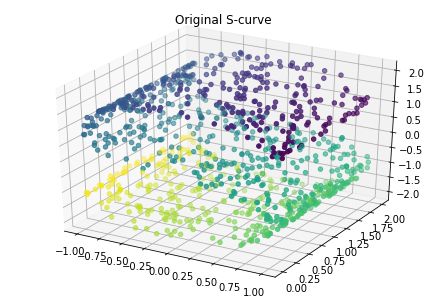

In [80]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:, 1], X[:, 2], c=color)
ax.set_title("Original S-curve")
pyplot.show()

### Linear PCA
PCA chooses what looks like the X and Z axes as the principal components, completely losing the information on the third axis. This is expected, as PCA looks for a linear decomposition. Since the space's axes are orthogonal and the curve is aligned to them, this is the expected choice. 

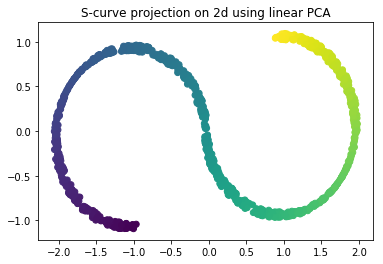

In [110]:
X_2d_pca = pca(X.T, 2)
pyplot.scatter(X_2d_pca[0, :], X_2d_pca[1, :], c=color)
pyplot.title("S-curve projection on 2d using linear PCA")
pyplot.show()

### KPCA with Gaussian kernel
Gaussian KPCA does better than linear, in that that it loses less information. We still lose some information on the edges of the curve. We chose sigma to be 0.88 since this is the mean stddev of the samples over all the axes. 

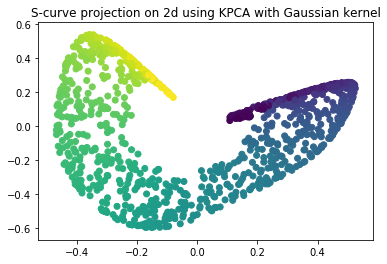

In [164]:
def exp_kernel(x, y, s):
    diff = x - y
    distance = np.abs(diff.dot(diff))
    return np.exp(-distance/s**2)
    
X_2d_exp = kpca(X.T, 2, exp_kernel, 0.886)
pyplot.scatter(X_2d_exp[0, :], X_2d_exp[1, :], c=color)
pyplot.title("S-curve projection on 2d using KPCA with Gaussian kernel")
pyplot.show()

### KPCA with a square inner product kernel
Performance here is not so good. The samples are spread out pretty well, but the middle section and edges overlap, so it's impossible to separate between them.

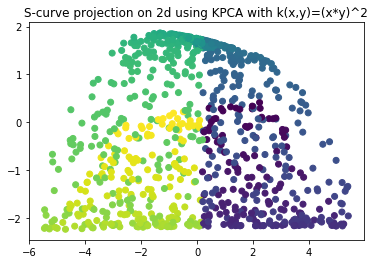

In [158]:
def another_kernel(x, y):
    return np.abs(np.inner(x, y)**2)
X_2d_another = kpca(X.T, 2, another_kernel)
pyplot.scatter(X_2d_another[0, :], X_2d_another[1, :], c=color)
pyplot.title("S-curve projection on 2d using KPCA with k(x,y)=(x*y)^2")
pyplot.show()